# Decision Trees Rectilinear Boundaries, Strengths and Limitation
In this notebook, you will run a code that allows you to visualise both decision trees and their ‎decision boundaries for a set of simple but useful datasets.

**Learning Outcomes:**
1. Ability to recognise the correspondence between decision trees structure and their decision boundaries
2. Ability to recognise how overfitting manifests itself on the DT decision boundaries
3. Ability to recognise the trend of divergence between training and testing when overfitting occurs


Please first download the [datasets](https://leeds365-my.sharepoint.com/:u:/g/personal/scsaalt_leeds_ac_uk/EUhkO1W6oqxFrDGYUinosOwBLDmuZcEraBT5Vmjcq--kuw?e=TCOdqu) and unzip them in the datasets folder inside the same folder of this code.
Also you can download a helper function [plotClassBoundary](https://leeds365-my.sharepoint.com/:u:/g/personal/scsaalt_leeds_ac_uk/EaTUWYJVyhZPhqrFDClSq8QBvte3MCW8Bn47H_HBzxCvPg?e=Jiuex4) and store it in the same folder to be able to use it in the import below. 
The datasets have been generated in our unit1 data sampling exercise (under section 'Generating Data with Specific Decision Boundaries'). It is provided here for convenience.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from itertools import product
from helpers import plotClassBoundary #  this is our own funciton that you need to download as per the previous exercise

## Decision Regions

The following function plots a tree. Be mindful not to rename plot_tree since this is the function ‎name that is used by sklearn.

In [2]:
def plotTree(clf, ax, fontsize=None):    
    # plot the trees... this must come after the plotting of the decision boundaries otherwise it will cause shifting
    plt.sca(ax) # brings the right subplot to focus for tree plotting
    
    plot_tree(clf, label='none',fontsize=fontsize,
              filled=True,  rounded=True,  impurity=False,
              feature_names=['$x_1$', '$x_2$'], class_names= ['C1', 'C2'] )
    ax.set_title('Decision Tree (depth='+str(clf.tree_.max_depth)+')')
    

Now we try all possible Classification Problems in our list of datasets

/Users/karan.verma/com5101m/unit2/helpers.py:61: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
/Users/karan.verma/com5101m/unit2/helpers.py:61: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
/Users/karan.verma/com5101m/unit2/helpers.py:61: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
/Users/karan.verma/com5101m/unit2/helpers.py:61: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfill

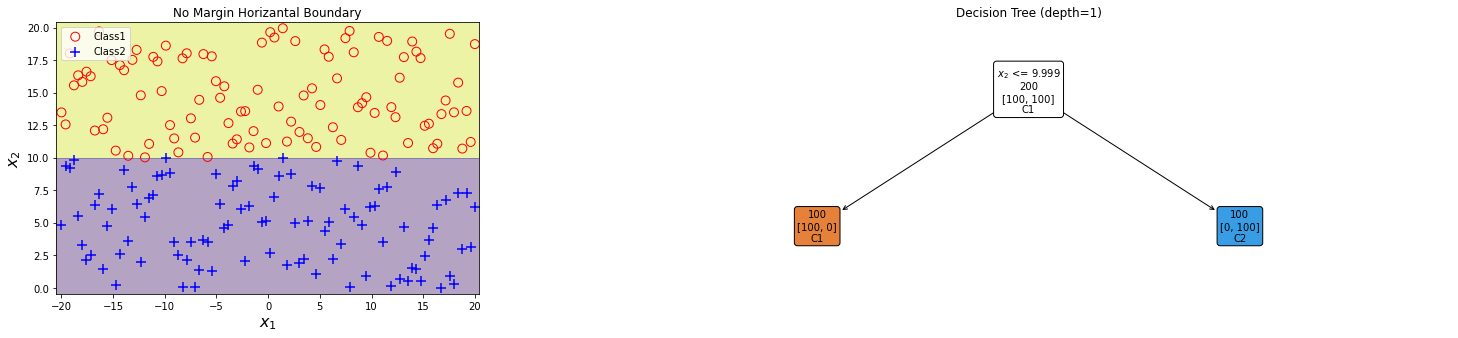

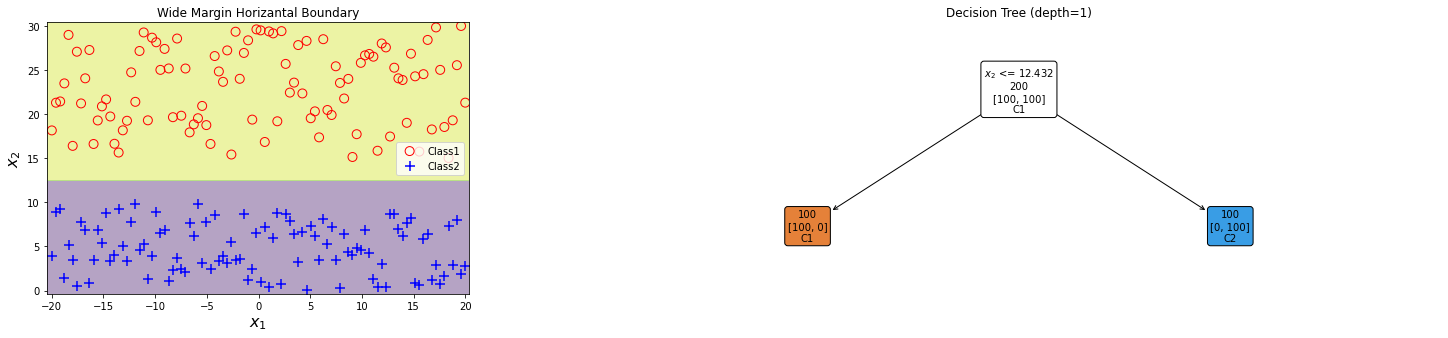

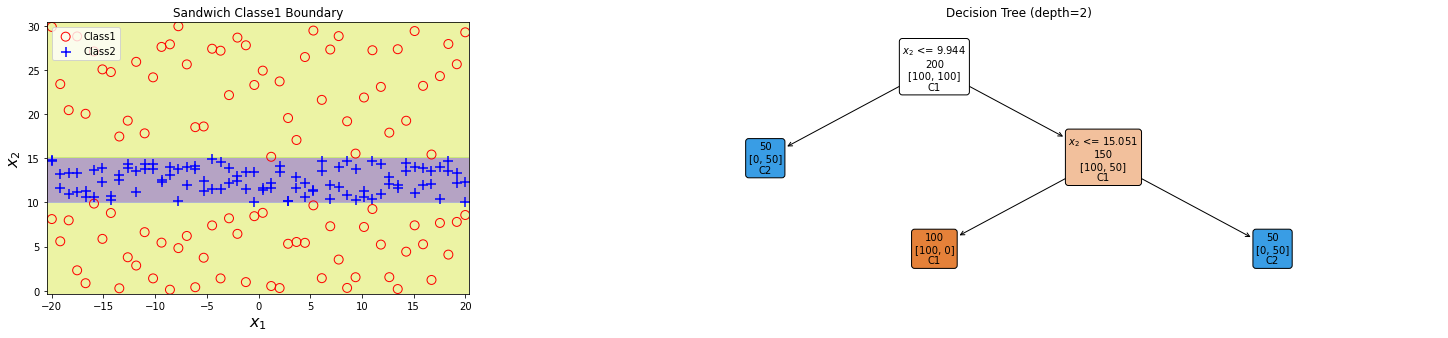

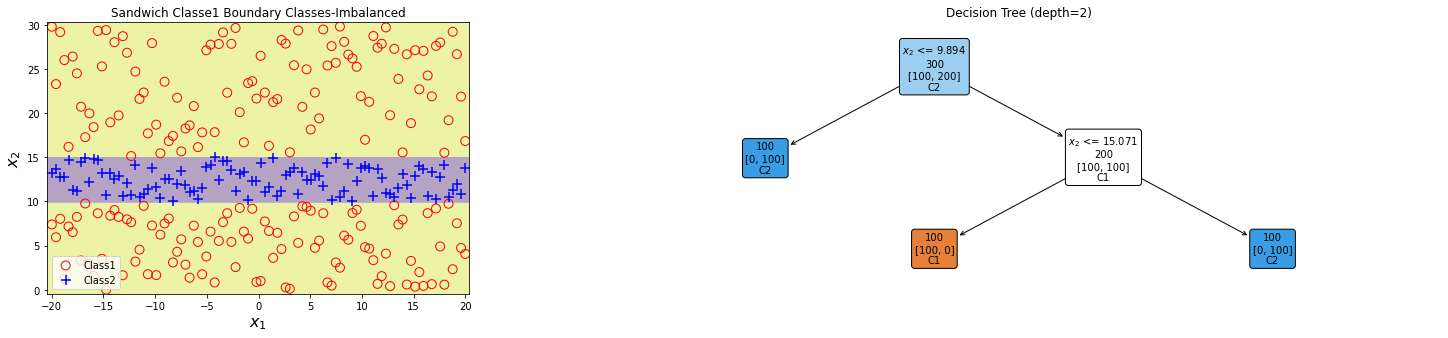

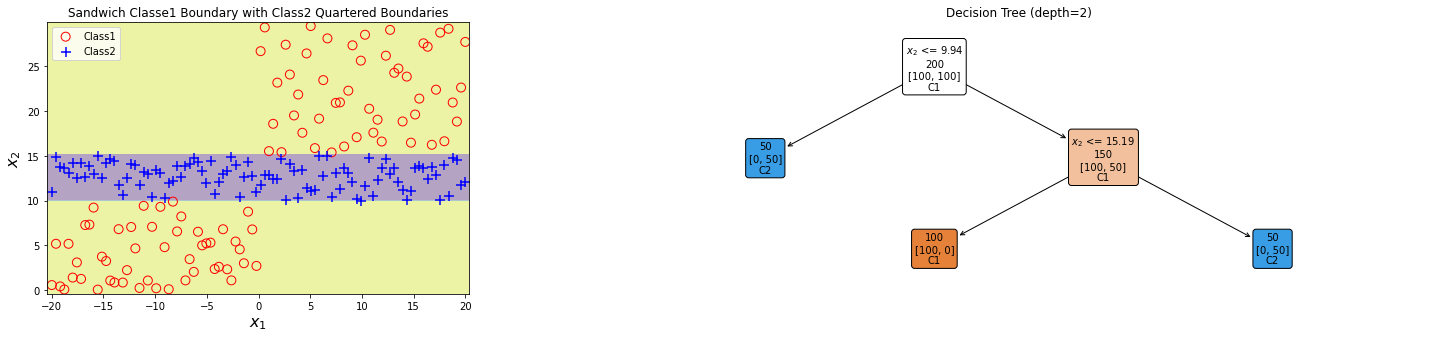

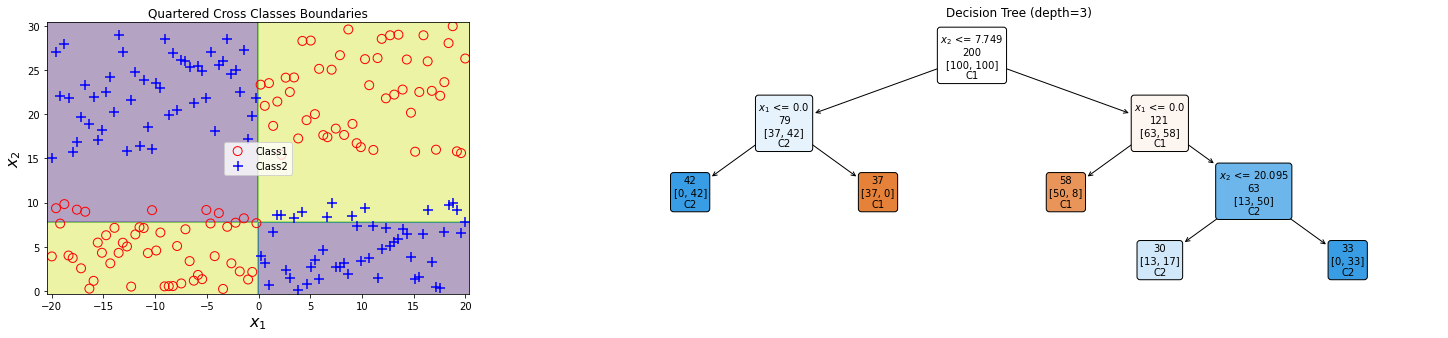

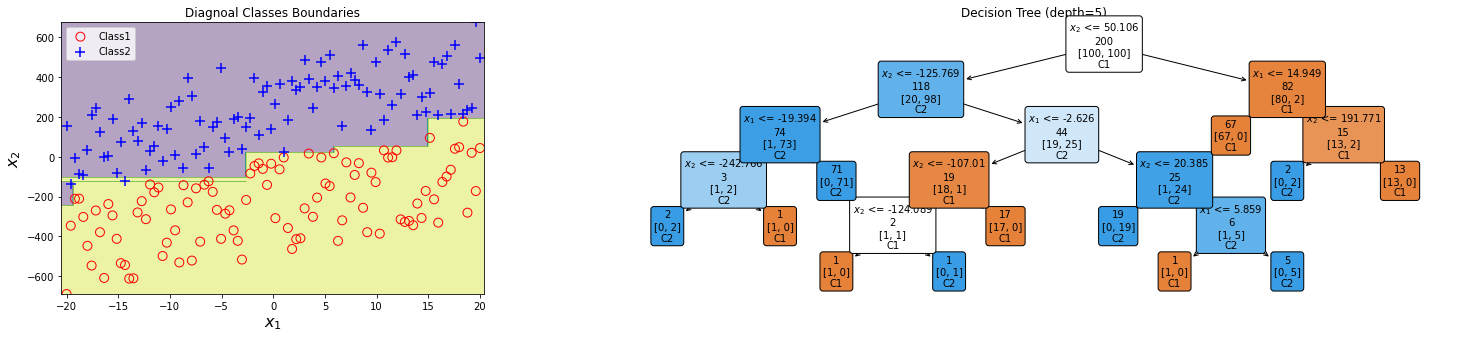

In [3]:

clf  = DecisionTreeClassifier()
clfs = [clf, clf, clf, clf, clf, clf, clf] 
titles = ['No Margin Horizantal Boundary',
          'Wide Margin Horizantal Boundary',          
          'Sandwich Classe1 Boundary',
          'Sandwich Classe1 Boundary Classes-Imbalanced',          
          'Sandwich Classe1 Boundary with Class2 Quartered Boundaries',
          'Quartered Cross Classes Boundaries' ,
          'Diagnoal Classes Boundaries'    
         ]
k = len(clfs)
for i in range(0,k):
    data = pd.read_csv('datasets/DTBoundaryC1C2_'+str(i)+'.csv').to_numpy()
    X, Y = data[:, [0,1]] , data[:, 2]
    clfs[i] = DecisionTreeClassifier()
    clfs[5] = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=60) if i==5 else None
    clfs[i].fit(X, Y)
    _, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(25, 5), gridspec_kw={'width_ratios': [1, 2]})
    plotClassBoundary(clfs[i], X[:,0], X[:,1], Y, ax=ax[0], title=titles[i],  fontsize=10)    
    plotTree(clfs[i], ax=ax[1], fontsize=10)
    plt.savefig('figures/DTBoundaryC1C2_'+str(i)+'.png')

# Decision Trees Overfitting and its Symptoms
<a id='DTOverfit'></a>

shape of data:  (1080, 3)


/Users/karan.verma/com5101m/unit2/helpers.py:61: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
/Users/karan.verma/com5101m/unit2/helpers.py:61: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


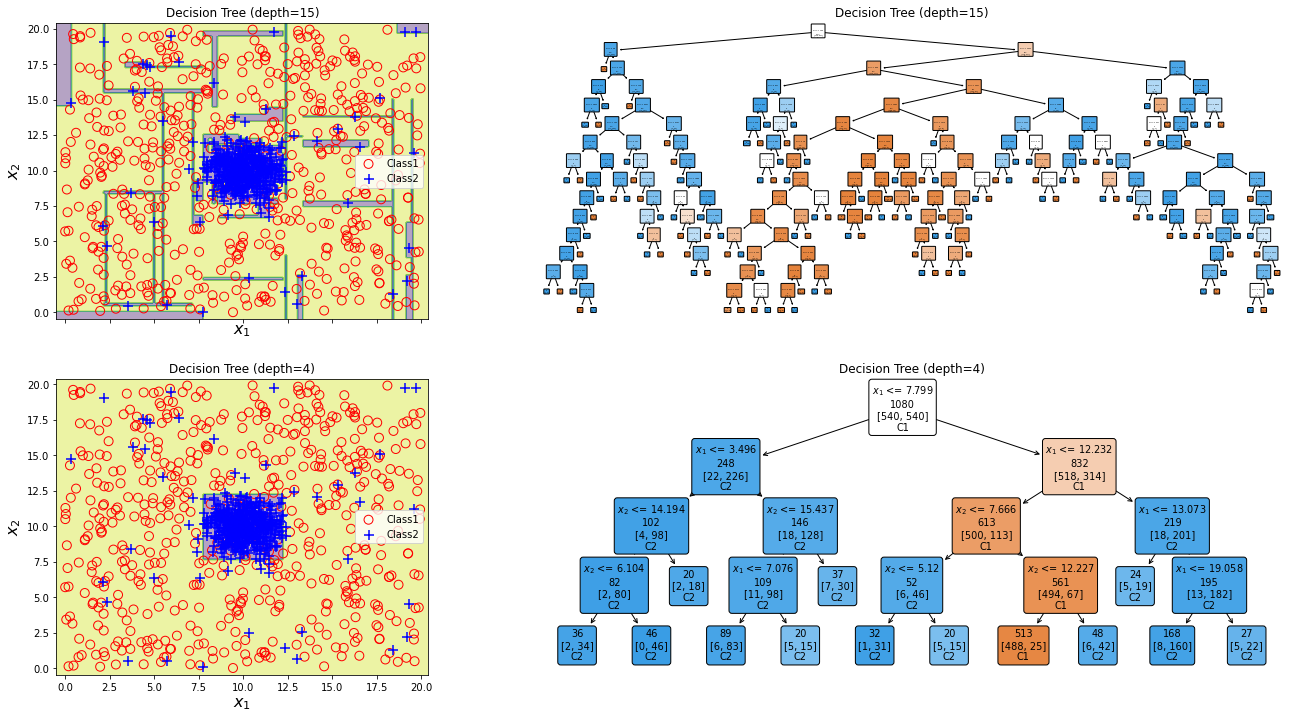

In [4]:
# Loading some Gaussian example data with noise
perc = 10 # how much percent of the data
data = pd.read_csv('datasets/GaussNoiseC1C2_'+str(perc)+'perc.csv').to_numpy()
print("shape of data: ", data.shape)
X = data[:, [0,1]]
Y = data[:, 2]

# Training classifiers
# Note that DecisionTreeClassifier uses CART by default, currently there is no parameter 
# to change it to another algorithm. The default criterion = 'gini' but this can be changed 
# to 'entropy'. We can choose splitter = 'best' for 

clf1 = DecisionTreeClassifier(max_depth=15) # cause overfitting
clf2 = DecisionTreeClassifier(max_depth=4,min_samples_split=int(255*perc/100),min_samples_leaf=20)# min_weight_fraction_leaf=0.1)

clfs = [clf1, clf2]
titles = ['Decision Tree (depth='+str(clf1.max_depth)+')', 
          'Decision Tree (depth='+str(clf2.max_depth)+')']

f, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(22, 12),  gridspec_kw={'width_ratios': [1, 2],'height_ratios': [2, 2]})
for i in range(2):        
    clfs[i].fit(X, Y)    
    plotClassBoundary(clfs[i], X[:,0], X[:,1], Y, ax=ax[i,0], title=titles[i])
    plotTree(clfs[i], ax=ax[i,1])
f.savefig('figures/DTOverfitting.png')


## Training vs Testing Performance to identify Overfitting

Let us now see how the testing and training errors or accuracies changes when overfitting start to occur. The below is not confined to decision trees, any other classifier or a supervised learning model have a similar behaviour when overfitting occurs

### Training and Test set creation

In [11]:
# Diclaimer the following functionality is from the Tan et al DT lab tutorial 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


In [15]:
Y_train.sum(), Y_train.shape[0] - Y_train.sum()

(195.0, 172.0)

### Model Fitting and Evaluation

Below we show Accuracy and Classification error, there are plenty of other metrics as you already ‎know.‎

**Your task** is to try other metrics including F1, Precision and Recall and Compare between them all, visually.

In [37]:
max_depths = np.arange(1,31)

trainAcc, testAcc = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainErr, testErr = np.zeros(len(max_depths)), np.zeros(len(max_depths))

trainPrec_C1, testPrec_C1 = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainPrec_C0, testPrec_C0 = np.zeros(len(max_depths)), np.zeros(len(max_depths))

trainPrec_C1, testPrec_C1 = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainPrec_C0, testPrec_C0 = np.zeros(len(max_depths)), np.zeros(len(max_depths))

trainRec_C1, testRec_C1 = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainRec_C0, testRec_C0 = np.zeros(len(max_depths)), np.zeros(len(max_depths))


trainF1_C1, testF1_C1 = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainF1_C0, testF1_C0 = np.zeros(len(max_depths)), np.zeros(len(max_depths))


index = 0
for depth in max_depths:
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
   
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    
    trainErr[index] = 1-accuracy_score(Y_train, Y_predTrain)
    testErr[index] = 1-accuracy_score(Y_test, Y_predTest)
    
    trainPrec_C1[index] = precision_score(Y_train, Y_predTrain)
    testPrec_C1[index] = precision_score(Y_test, Y_predTest)
    
    trainPrec_C0[index] = precision_score(Y_train, Y_predTrain, pos_label=0)
    testPrec_C0[index] = precision_score(Y_test, Y_predTest, pos_label=0)
    
    trainRec_C1[index] = recall_score(Y_train, Y_predTrain)
    testRec_C1[index] = recall_score(Y_test, Y_predTest)
    
    trainRec_C0[index] = recall_score(Y_train, Y_predTrain, pos_label=0)
    testRec_C0[index] = recall_score(Y_test, Y_predTest, pos_label=0)
    
    trainF1_C1[index] = f1_score(Y_train, Y_predTrain)
    testF1_C1[index] = f1_score(Y_test, Y_predTest)
    
    trainF1_C0[index] = f1_score(Y_train, Y_predTrain, pos_label=0)
    testF1_C0[index] = f1_score(Y_test, Y_predTest, pos_label=0)
    
    index += 1

### Plot of training and test accuracies


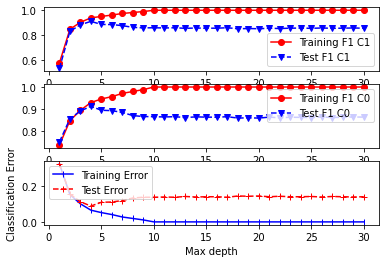

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(max_depths,trainF1_C1,'ro-',max_depths,testF1_C1,'bv--')
ax2.plot(max_depths,trainF1_C0,'ro-',max_depths,testF1_C0,'bv--')
ax3.plot(max_depths,trainErr,'b|-',max_depths,testErr,'r+--')

ax1.legend(['Training F1 C1','Test F1 C1'])
ax2.legend(['Training F1 C0','Test F1 C0'])
ax3.legend(['Training Error','Test Error'])


plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()
fig.tight_layout()

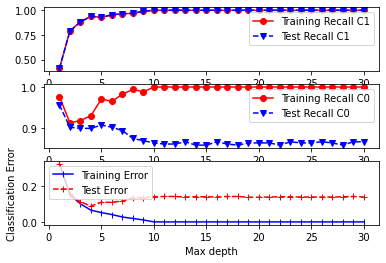

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(max_depths,trainRec_C1,'ro-',max_depths,trainRec_C1,'bv--')
ax2.plot(max_depths,trainRec_C0,'ro-',max_depths,testRec_C0,'bv--')
ax3.plot(max_depths,trainErr,'b|-',max_depths,testErr,'r+--')

ax1.legend(['Training Recall C1','Test Recall C1'])
ax2.legend(['Training Recall C0','Test Recall C0'])
ax3.legend(['Training Error','Test Error'])


plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()
fig.tight_layout()

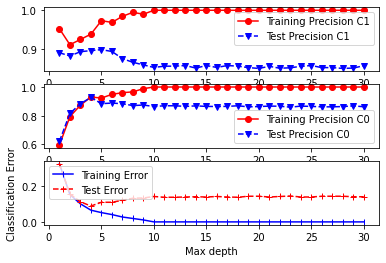

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(max_depths,trainPrec_C1,'ro-',max_depths,testPrec_C1,'bv--')
ax2.plot(max_depths,trainPrec_C0,'ro-',max_depths,testPrec_C0,'bv--')
ax3.plot(max_depths,trainErr,'b|-',max_depths,testErr,'r+--')

ax1.legend(['Training Precision C1','Test Precision C1'])
ax2.legend(['Training Precision C0','Test Precision C0'])
ax3.legend(['Training Error','Test Error'])


plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()
fig.tight_layout()

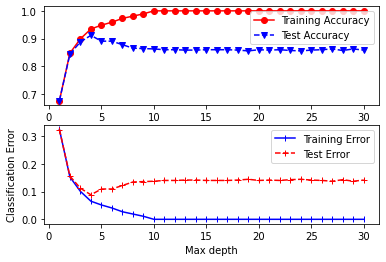

In [9]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(max_depths,trainAcc,'ro-',max_depths,testAcc,'bv--')
ax2.plot(max_depths,trainErr,'b|-',max_depths,testErr,'r+--')

ax1.legend(['Training Accuracy','Test Accuracy'])
ax2.legend(['Training Error','Test Error'])


plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()